In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, linregress

import os
import time
import itertools

/home/jcthompson5@ad.wisc.edu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# number of folds
n_splits = 20

# cd strains
strains = ['CDanc', 'CDevo']

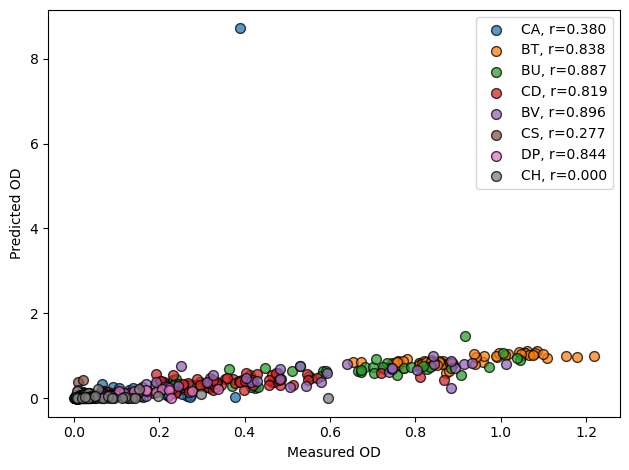

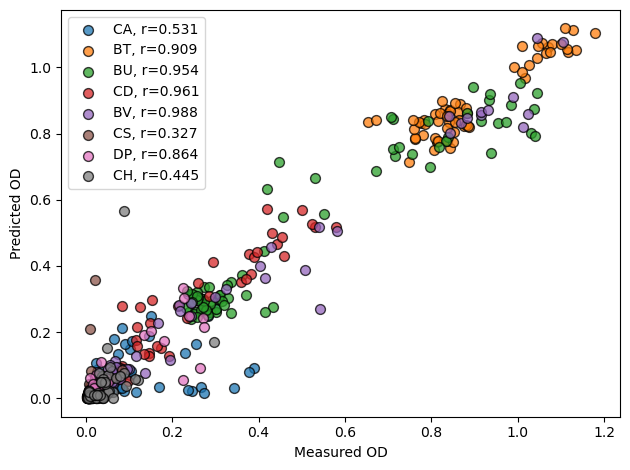

In [4]:
# run kfold for each file 
for strain in strains:
    
    # import data
    df = []
    kf_df = []
    for i in range(n_splits):
        df.append(pd.read_csv(f"Sulaiman_HOI_nested_kfold/folds_{strain}/test_{i}.csv"))
        kf_df.append(pd.read_csv(f"Sulaiman_HOI_nested_kfold/{strain}_preds/{strain}_pred_{i}.csv"))
    df = pd.concat(df)
    kf_df = pd.concat(kf_df)

    # species names 
    species = kf_df.columns.values[2:]
    for i, sp in enumerate(species):

        # pull measured and predicted species data 
        true = [] 
        pred = [] 

        # ignore species that weren't inoculated
        for treatment, kf_df_exp in kf_df.groupby('Treatments'):

            # sort by time
            df_exp = df.iloc[df.Treatments.values==treatment].sort_values(by='Time').copy()
            kf_df_exp.sort_values(by='Time', inplace=True)

            # if species was present 
            if df_exp[sp].values[0] > 0:

                # append values
                true.append(df_exp[sp].values[1:])

                # get predicted condition
                pred.append(kf_df_exp[sp].values[1:])

        # concatenate values
        true = np.concatenate(true)
        pred = np.concatenate(pred)
    
        # plot
        m, b, r, p, se = linregress(true, pred)
        plt.scatter(true, pred, s=50, edgecolor='k', alpha=.75, label="{}, r={:.3f}".format(sp.split("_")[0], r))

    plt.legend()
    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.xticks()
    plt.yticks()
    # plt.ylim([-.1, 2.5])
    # plt.xlim([-.1, 2.1])
    plt.tight_layout()
    # plt.savefig("../figures/fig3/gLV_kfold.svg", dpi=300)
    plt.show()

In [23]:
# run kfold for each file 
for strain in strains:
    
    # import data
    df = []
    kf_df = []
    for i in range(n_splits):
        df.append(pd.read_csv(f"Sulaiman_HOI_nested_kfold/folds_{strain}/test_{i}.csv"))
        kf_df.append(pd.read_csv(f"Sulaiman_HOI_nested_kfold/{strain}_preds/{strain}_pred_{i}.csv"))
    df = pd.concat(df)
    kf_df = pd.concat(kf_df)

    # species names 
    species = kf_df.columns.values[2:]

    all_treatments = []
    all_species = []
    all_true = []
    all_pred = []

    for i, sp in enumerate(species):

        # pull measured and predicted species data 
        treatments = []
        true = [] 
        pred = [] 

        # ignore species that weren't inoculated
        for treatment, kf_df_exp in kf_df.groupby('Treatments'):

            # sort by time
            df_exp = df.iloc[df.Treatments.values==treatment].sort_values(by='Time').copy()
            kf_df_exp.sort_values(by='Time', inplace=True)

            # if species was present 
            if df_exp[sp].values[0] > 0:

                # append values
                true.append(df_exp[sp].values[1:])

                # get predicted condition
                pred.append(kf_df_exp[sp].values[1:])

                # record treatment
                all_treatments.append([treatment]*len(df_exp[sp].values[1:]))         

        # concatenate values
        true = np.concatenate(true)
        pred = np.concatenate(pred)

        # append values
        all_species.append(np.array([sp]*len(true)))
        all_true.append(true)
        all_pred.append(pred)

    all_treatments = np.concatenate(all_treatments)
    all_species = np.concatenate(all_species)
    all_true = np.concatenate(all_true)
    all_pred = np.concatenate(all_pred)

    kf_df = pd.DataFrame()
    kf_df['Treatments'] = all_treatments
    kf_df['species'] = all_species
    kf_df['true'] = all_true
    kf_df['pred'] = all_pred

    kf_df.to_csv(f"kfold/{strain}_nested_20fold_L1.csv", index=False)